In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/combined_datasets/preprocessed_DNN.csv", low_memory=False) 
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.132916e+09,...,0,0,0,0,1,0,0,1,0,0
1,0.0,0.0,24819.0,1360.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0,0,0,0,0,1,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,2.888737e+09,...,0,0,0,0,1,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15757382.0,1.154609e+09,...,0,0,0,0,1,0,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79628.0,2.371704e+09,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0,0,0,0,0,1,0,0,1,0
1909667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0,0,0,0,0,1,0,0,1,0
1909668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.050967e+09,...,0,0,0,0,1,0,0,1,0,0
1909669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1.319095e+09,...,0,0,0,0,1,0,0,1,0,0


In [4]:
df=df[0:int(len(df)*0.1)]

In [5]:
print(df['Attack_type'])

0            Normal
1         DDoS_ICMP
2            Normal
3            Normal
4            Normal
            ...    
190962       Normal
190963       Normal
190964       Normal
190965       Normal
190966       Normal
Name: Attack_type, Length: 190967, dtype: object


In [6]:
df['Attack_type'].value_counts()

Normal                   135985
DDoS_UDP                  12255
DDoS_ICMP                  6892
SQL_injection              5146
Vulnerability_scanner      5061
Password                   5044
DDoS_TCP                   5024
DDoS_HTTP                  4758
Uploading                  3732
Backdoor                   2354
Port_Scanning              2084
XSS                        1541
Ransomware                  960
Fingerprinting               88
MITM                         43
Name: Attack_type, dtype: int64

In [7]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)
#feat_cols

In [8]:
len(feat_cols)

96

In [9]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

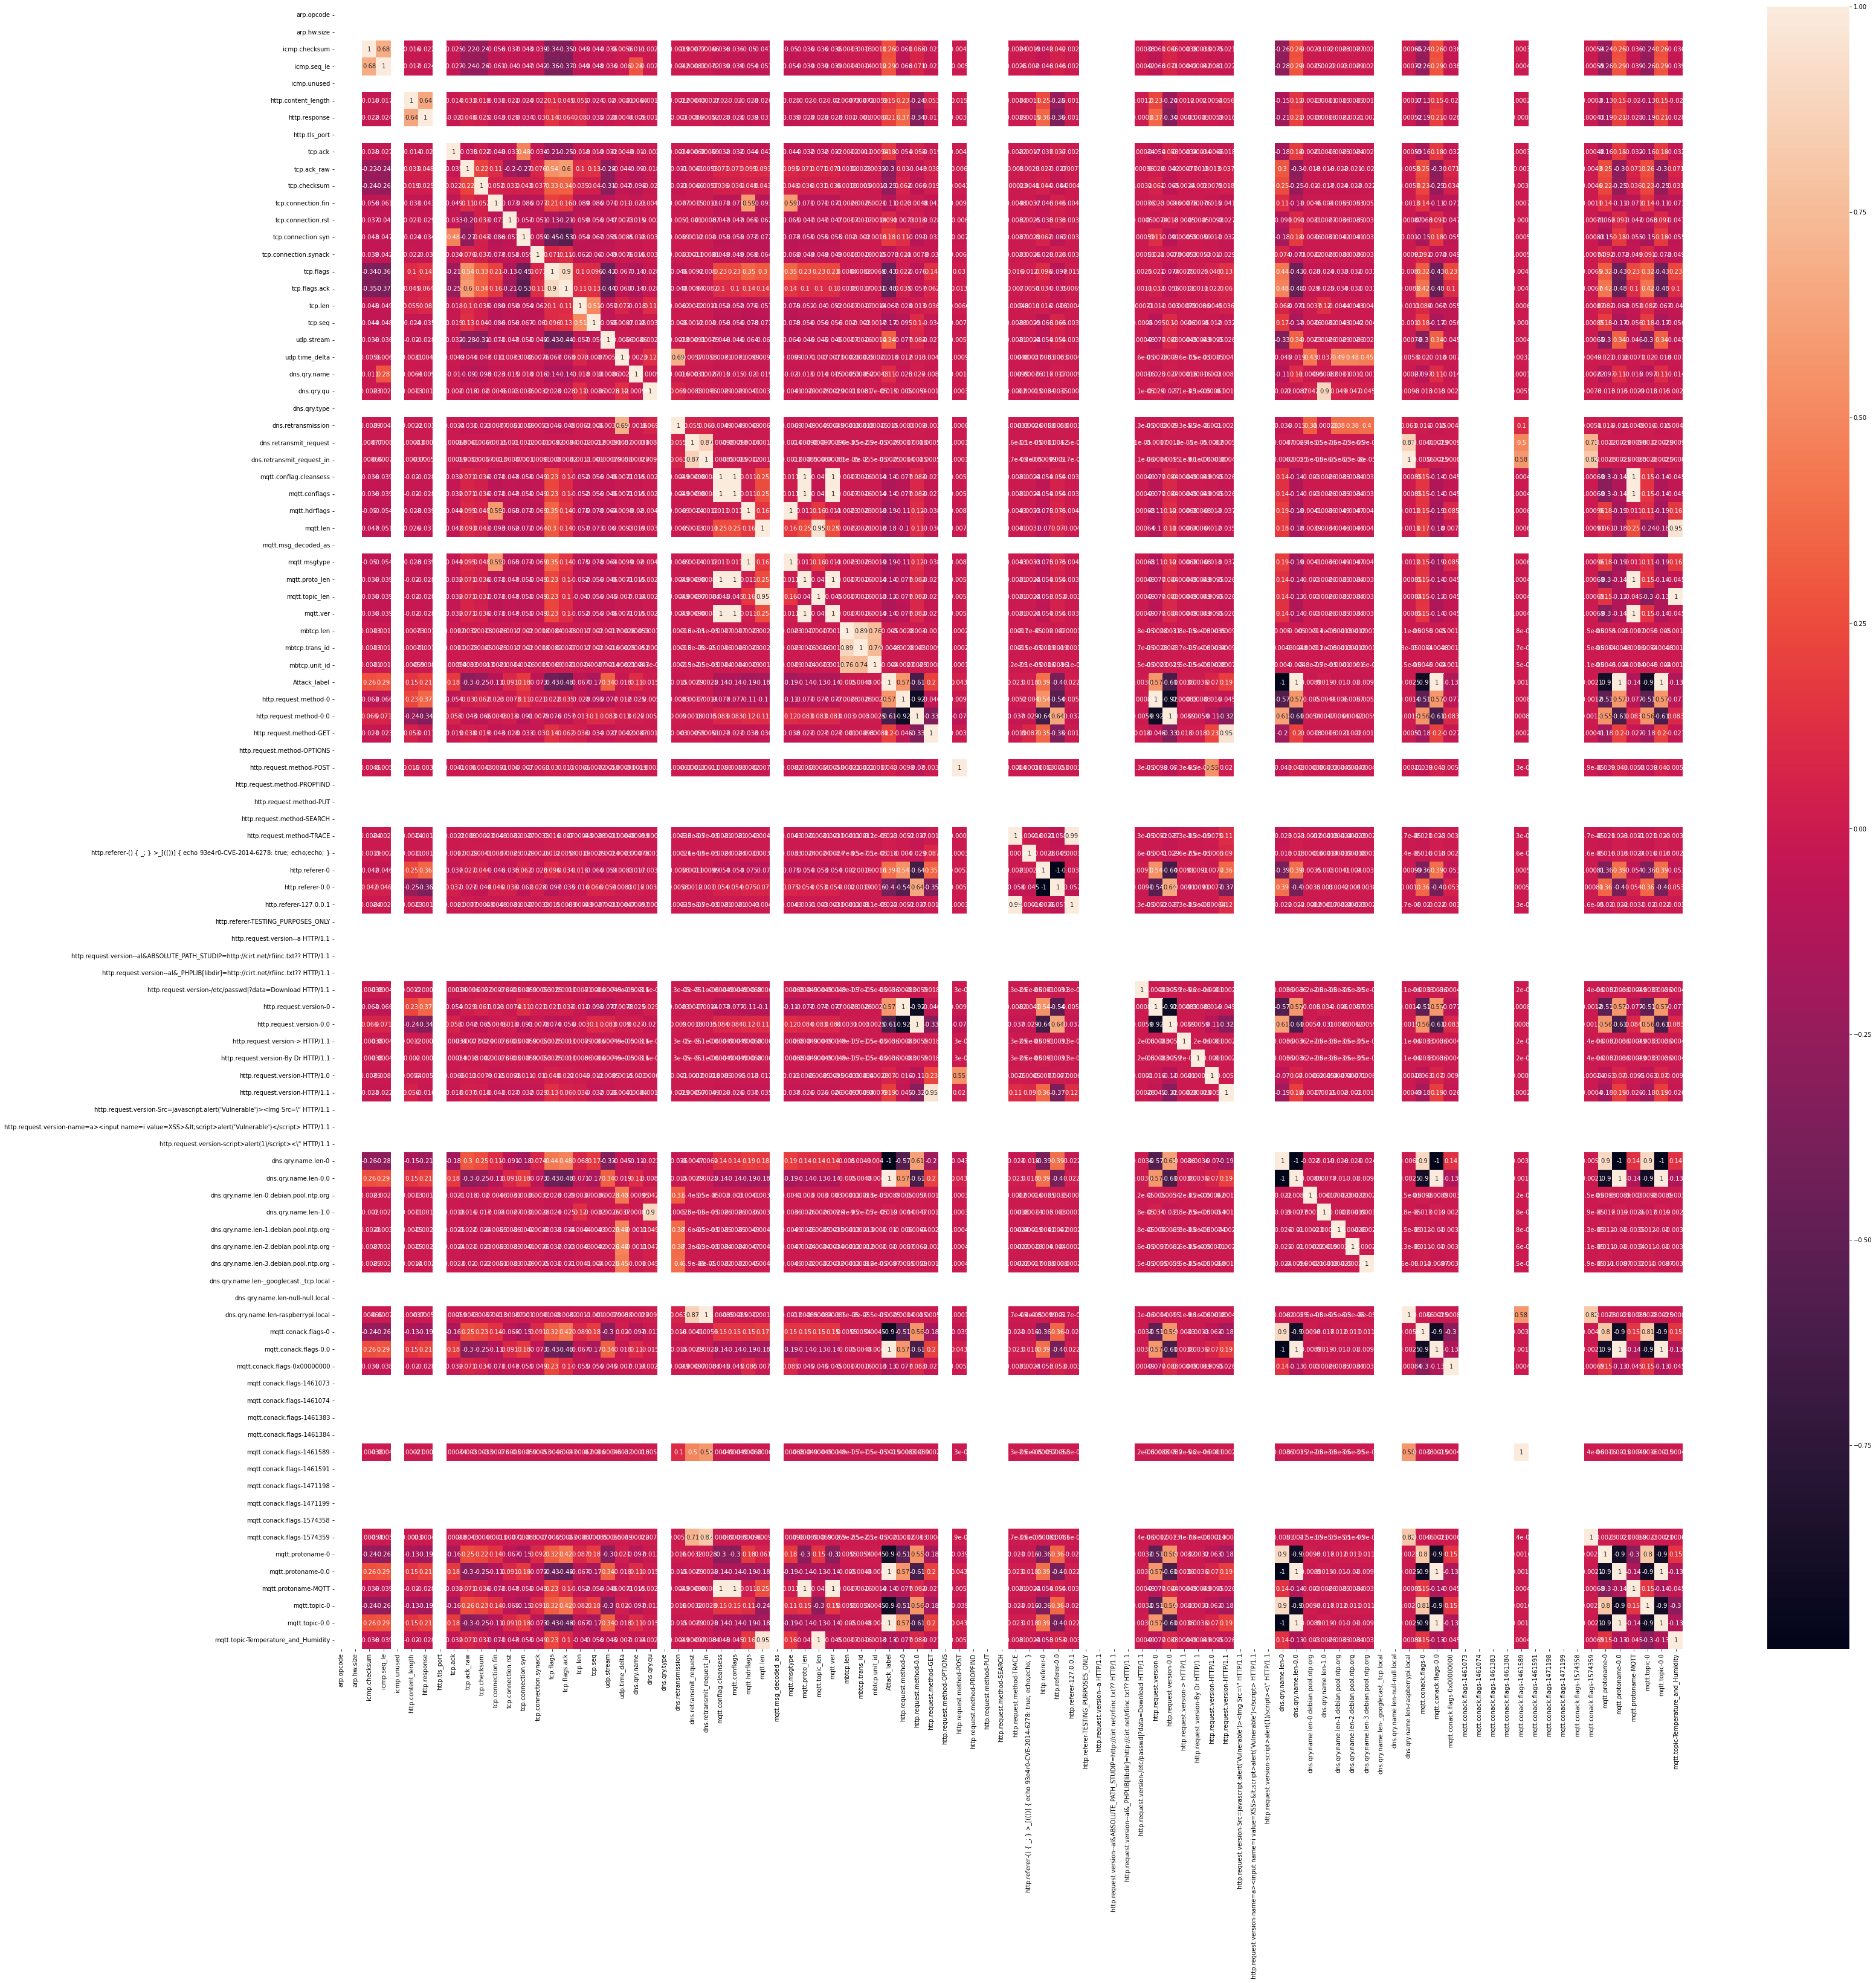

In [10]:
corr_matrix = df[feat_cols].corr()
fig = plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True)

In [11]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [12]:
df.drop(skip_list, axis=1, inplace=True)
feat_cols = list(df.columns)
feat_cols.remove(label_col)
# feat_cols

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


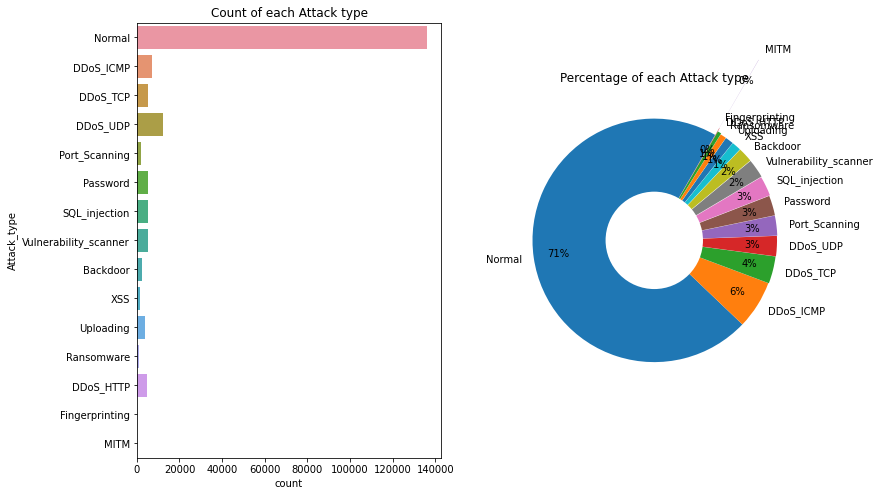

In [13]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[label_col].dropna().value_counts()))/sum(list(df[label_col].dropna().value_counts())))[::-1])[:]
labels = list(df[label_col].dropna().unique())[:]
sizes = df[label_col].value_counts()[:]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.8)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))
sns.countplot(y=label_col, data=df, ax=ax1)
ax1.set_title("Count of each Attack type")
ax2.set_title("Percentage of each Attack type")
plt.show()

##  federated Learning

In [14]:
import numpy as np
import random
import cv2
import os
# from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Reshape
from tensorflow.keras import Input
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Multiply
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import Attention
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [15]:
X = df.drop([label_col], axis=1)
y = df[label_col]

del df

In [16]:
# X.drop(col_list, axis=1, inplace=True)

In [17]:
print(list(X.columns))

['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le', 'http.content_length', 'http.response', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label', 'http.request.method-0', 'http.request.method-0.0', 'http.request.method-GET', 'http.request.method-OPTIONS', 'http.request.method-POST', 'http.request.method-PROPFIND', 'http.request.method-PUT', 'http.request.method-SEARCH', 'http.request.method-TRACE', 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }', 'http.referer-0', 'http.referer-0

In [18]:
x_col=list(X.columns)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

num_classes = len(np.unique(y_train))


In [20]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [21]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [22]:
from matplotlib import pyplot

In [23]:
len(x_col)

92

In [24]:
x_col=list(X.columns)

In [25]:
col_list=[]

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.03422
Feature: 3, Score: 0.02350
Feature: 4, Score: 0.01015
Feature: 5, Score: 0.00347
Feature: 6, Score: 0.08044
Feature: 7, Score: 0.03412
Feature: 8, Score: 0.05728
Feature: 9, Score: 0.00132
Feature: 10, Score: 0.00963
Feature: 11, Score: 0.00681
Feature: 12, Score: 0.00077
Feature: 13, Score: 0.03799
Feature: 14, Score: 0.00984
Feature: 15, Score: 0.03678
Feature: 16, Score: 0.04616
Feature: 17, Score: 0.04596
Feature: 18, Score: 0.00019
Feature: 19, Score: 0.00305
Feature: 20, Score: 0.00004
Feature: 21, Score: 0.00002
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00176
Feature: 26, Score: 0.00272
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00134
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00057
Feature: 31, Score: 0.00003
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.05174
Fe

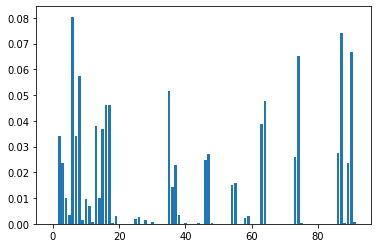

In [26]:
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
 if(v== 0.00):
   col_list.append(x_col[i])
#  print(feat_cols[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [27]:
col_list

['arp.opcode',
 'arp.hw.size',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.len',
 'mqtt.proto_len',
 'mbtcp.len',
 'mbtcp.unit_id',
 'http.request.method-OPTIONS',
 'http.request.method-PROPFIND',
 'http.request.method-PUT',
 'http.request.method-SEARCH',
 'http.referer-TESTING_PURPOSES_ONLY',
 'http.request.version--a HTTP/1.1',
 'http.request.version--al&ABSOLUTE_PATH_STUDIP=http://cirt.net/rfiinc.txt?? HTTP/1.1',
 'http.request.version--al&_PHPLIB[libdir]=http://cirt.net/rfiinc.txt?? HTTP/1.1',
 'http.request.version-Src=javascript:alert(\'Vulnerable\')><Img Src=\\" HTTP/1.1',
 "http.request.version-name=a><input name=i value=XSS>&lt;script>alert('Vulnerable')</script> HTTP/1.1",
 'http.request.version-script>alert(1)/script><\\" HTTP/1.1',
 'dns.qry.name.len-_googlecast._tcp.local',
 'dns.qry.name.len-null-null.local',
 'dns.qry.name.len-raspberrypi.local',
 'mqtt.conack.flags-1461073',
 'mqtt.conack.flags-1461074',
 'mqtt.conack.flags

In [28]:
len(feat_cols)

92

In [29]:
X.drop(col_list, axis=1, inplace=True)

In [30]:
print(len(list(X.columns)))

60


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [32]:
del X
del y

In [33]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical 

label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
# standard_scaler= StandardScaler()
# X_train = standard_scaler.fit_transform(X_train)
# X_test = standard_scaler.transform(X_test)

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [35]:
def create_clients(X, y, num_clients=10, initial='clients'):
    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #randomize the data
    data = list(zip(X, y))
    random.shuffle(data)

    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))} 

In [36]:
#create clients
clients = create_clients(X_train, y_train, num_clients=10, initial='client')

In [37]:
def batch_data(data_shard, bs=32): #bs before change was 32
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

In [38]:
#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)
    
#process and batch the test set  
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

In [39]:
input_shape = X_train.shape[1:]

class ProposedModel:
    @staticmethod
    def build(shape, classes):
        input_layer = Input(shape=(shape,))
        x = Dense(784)(input_layer)
        x1 = Reshape((28, 28, 1))(x)
        x1 = Conv2D(8, 5)(x1)
        x1 = MaxPooling2D(3)(x1)
        x1 = Flatten()(x1)
        x1 = Activation("relu")(x1)
        x1 = Dense(512)(x1)
        x1 = Activation("relu")(x1)
        x1 = Dense(200)(x1)
        x1 = Activation("relu")(x1)

        x2 = Dense(512)(x)
        x2 = Activation("relu")(x2)
        x2 = Dense(200)(x2)
        x2 = Activation("relu")(x2)

        x3 = Attention()([x1, x2])
        # x3 = Concatenate()([x1, x2])
        # x3 = Activation('relu')(x3)
        # x3 = Dense(classes)(x3)
        x4 = Dense(200)(x)
        x3 = Multiply()([x3, x4])
        x3 = Dense(classes)(x3)

        output_layer = Activation("softmax")(x3)
        return Model(inputs = input_layer, outputs = output_layer)

In [40]:
# from tensorflow.keras.utils import plot_model

# test_model = ProposedModel()
# test_model = test_model.build(84, 95)
# # plot_model(test_model)
# plot_model(test_model,
#     to_file='model.png',show_shapes=True,show_dtype=False,show_layer_names=True,rankdir='TB',expand_nested=False,dpi=500,layer_range=None,show_layer_activations=True
# )


In [41]:
# test_model.summary()

In [42]:
lr = 0.01 
comms_round = 10
loss='categorical_crossentropy'
metrics = ['accuracy']
optimizer = SGD(lr=lr, 
                decay=lr / comms_round, 
                momentum=0.9
               )             

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [43]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count

def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final

def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad

def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1))
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss

In [44]:
losses = {}
#initialize global model
gl_model = ProposedModel()
global_model = gl_model.build(input_shape[0], num_classes)
        
#commence global training loop
for comm_round in range(comms_round):
            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        loc_model = ProposedModel()
        local_model = loc_model.build(input_shape[0], num_classes)
        # local_model.summary()
        local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        #fit local model with client's data
        hist = local_model.fit(clients_batched[client], epochs=3, verbose=1)

        #adding saving history object for each client
        if client not in losses:
          losses[client] = [hist]
        else:
          losses[client].append(hist)
        
        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)

Epoch 1/3
478/478 [==============================] - 11s 4ms/step - loss: 0.3365 - accuracy: 0.8850
Epoch 2/3
478/478 [==============================] - 2s 4ms/step - loss: 0.1679 - accuracy: 0.9253
Epoch 3/3
478/478 [==============================] - 2s 4ms/step - loss: 0.1596 - accuracy: 0.9275
Epoch 1/3
478/478 [==============================] - 2s 4ms/step - loss: 0.4674 - accuracy: 0.8589
Epoch 2/3
478/478 [==============================] - 2s 4ms/step - loss: 0.1918 - accuracy: 0.9177
Epoch 3/3
478/478 [==============================] - 2s 4ms/step - loss: 0.1737 - accuracy: 0.9247
Epoch 1/3
478/478 [==============================] - 3s 4ms/step - loss: 0.5627 - accuracy: 0.8420
Epoch 2/3
478/478 [==============================] - 2s 4ms/step - loss: 0.1975 - accuracy: 0.9182
Epoch 3/3
478/478 [==============================] - 2s 4ms/step - loss: 0.1744 - accuracy: 0.9256
Epoch 1/3
478/478 [==============================] - 2s 4ms/step - loss: 0.6438 - accuracy: 0.8272
Epoch 2/3

In [45]:
print(losses)

{'client_3': [<keras.callbacks.History object at 0x7f48061e6040>, <keras.callbacks.History object at 0x7f477e6f13a0>, <keras.callbacks.History object at 0x7f479c714a30>, <keras.callbacks.History object at 0x7f477dc49dc0>, <keras.callbacks.History object at 0x7f477d1a8460>, <keras.callbacks.History object at 0x7f477c995c70>, <keras.callbacks.History object at 0x7f470c815dc0>, <keras.callbacks.History object at 0x7f47232ddbb0>, <keras.callbacks.History object at 0x7f470c9b8ac0>, <keras.callbacks.History object at 0x7f46d707d7f0>], 'client_1': [<keras.callbacks.History object at 0x7f4803858160>, <keras.callbacks.History object at 0x7f477d64ebe0>, <keras.callbacks.History object at 0x7f477e1e2970>, <keras.callbacks.History object at 0x7f477eca07f0>, <keras.callbacks.History object at 0x7f477caced60>, <keras.callbacks.History object at 0x7f477c55b3a0>, <keras.callbacks.History object at 0x7f4723209430>, <keras.callbacks.History object at 0x7f470c27bbb0>, <keras.callbacks.History object at 0

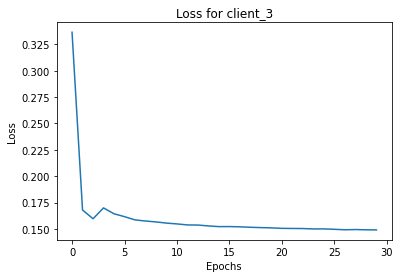

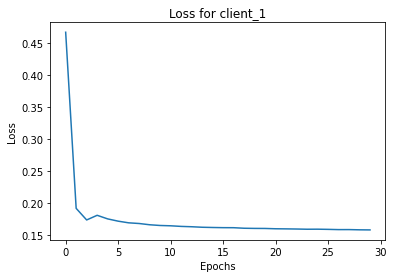

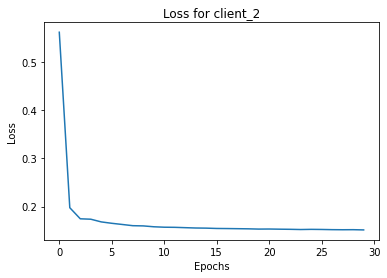

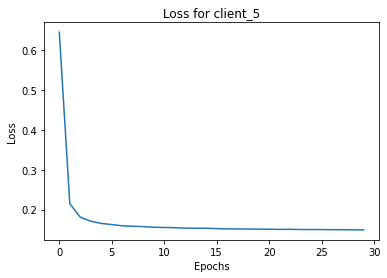

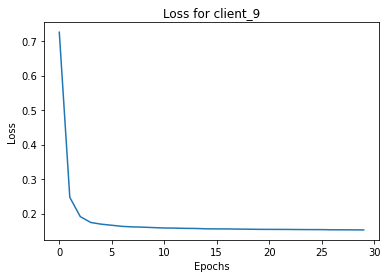

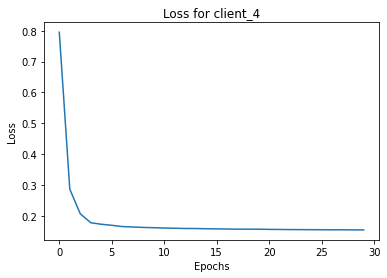

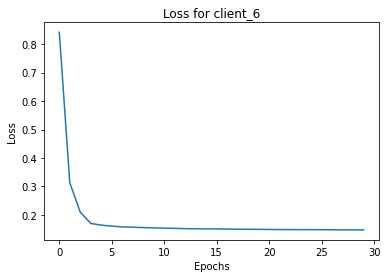

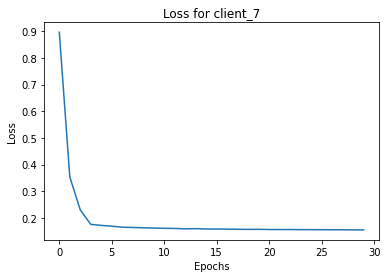

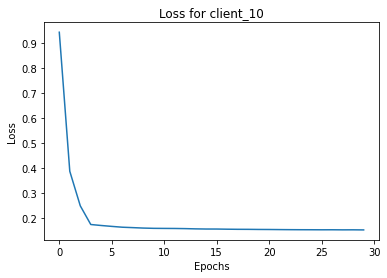

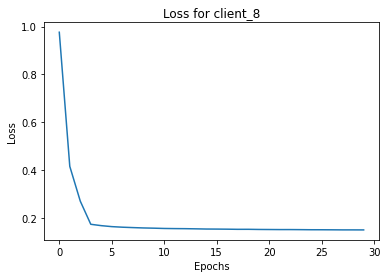

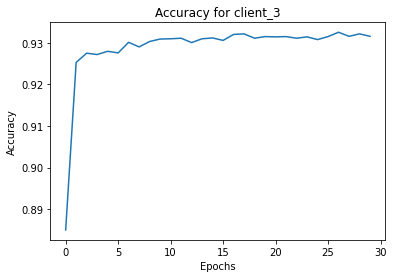

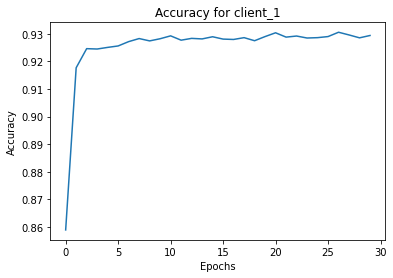

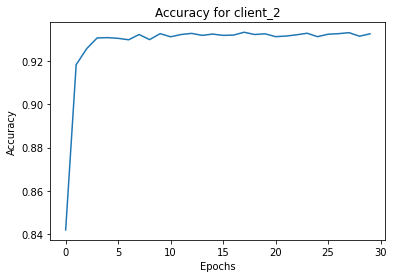

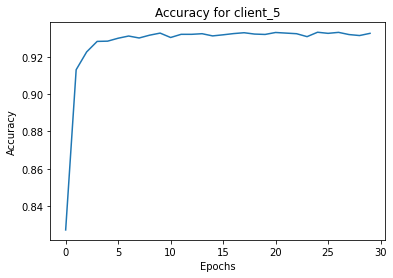

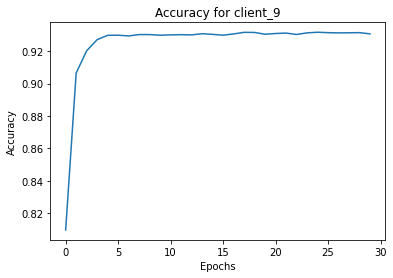

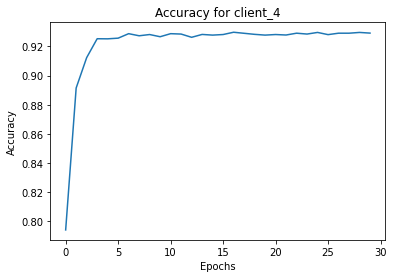

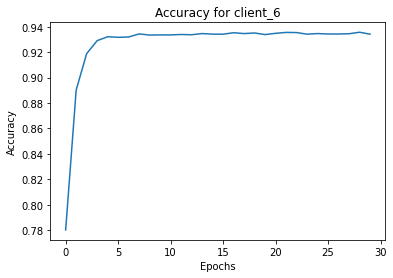

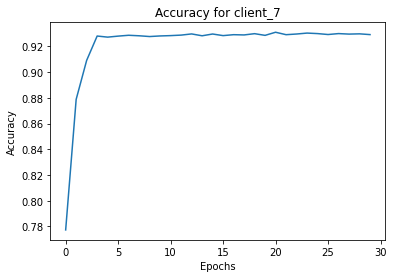

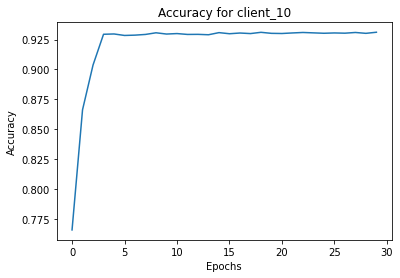

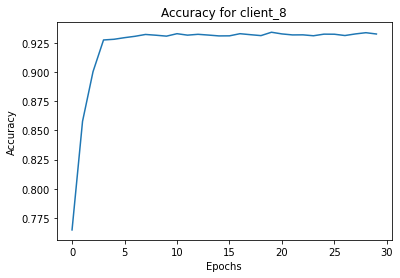

In [46]:
file_names = []

for client in losses.keys():
  c_loss = []
  for hist in losses[client]:
    for j in hist.history['loss']:
      c_loss.append(j)
  plt.title('Loss for ' + client)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(c_loss)
  plt.savefig('Loss for ' + client + '.png', dpi = 300)
  file_names.append('Loss for ' + client + '.png')
  plt.show()

for client in losses.keys():
  c_loss = []
  for hist in losses[client]:
    for j in hist.history['accuracy']:
      c_loss.append(j)
  plt.title('Accuracy for ' + client)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(c_loss)
  plt.savefig('Accuracy for ' + client + '.png', dpi = 300)
  file_names.append('Accuracy for ' + client + '.png')
  plt.show()

In [47]:
from google.colab import files
for filename in file_names:
  files.download(filename) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
 
def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1))
    print(classification_report(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1)))
    conf = confusion_matrix(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1))
    print(conf)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf)
    cm_display.plot()
    plt.show()
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss

1194/1194 [==============================] - 2s 2ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      0.72      0.81       604
           1       0.96      0.71      0.81      1266
           2       0.96      0.97      0.97      1321
           3       1.00      0.68      0.81      1459
           4       0.99      0.98      0.98      2556
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00     27272
           8       0.76      0.43      0.55      1725
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.28      0.51      0.36       568
          12       0.35      0.56      0.43       450
          13       0.82      0.94      0.88       864
          14       0.20      0.59      0.30       109

    accuracy                           0.93     38194
   macro avg       0.55      0.54      0.53     38194
weighted avg       0.96   

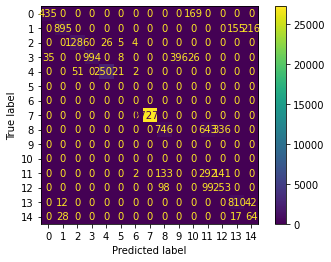

comm_round: 10 | global_acc: 93.075% | global_loss: 1.9015830755233765


In [75]:
acc, loss = test_model(X_test, y_test, global_model, comms_round)